# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План исследования:
* Предобработка данных;
* Инженерия переменных;
* Исследовательский анализ данных;
* Общий вывод.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

PATH = './'

df = pd.read_csv(PATH+'real_estate_data.csv', sep='\t')

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

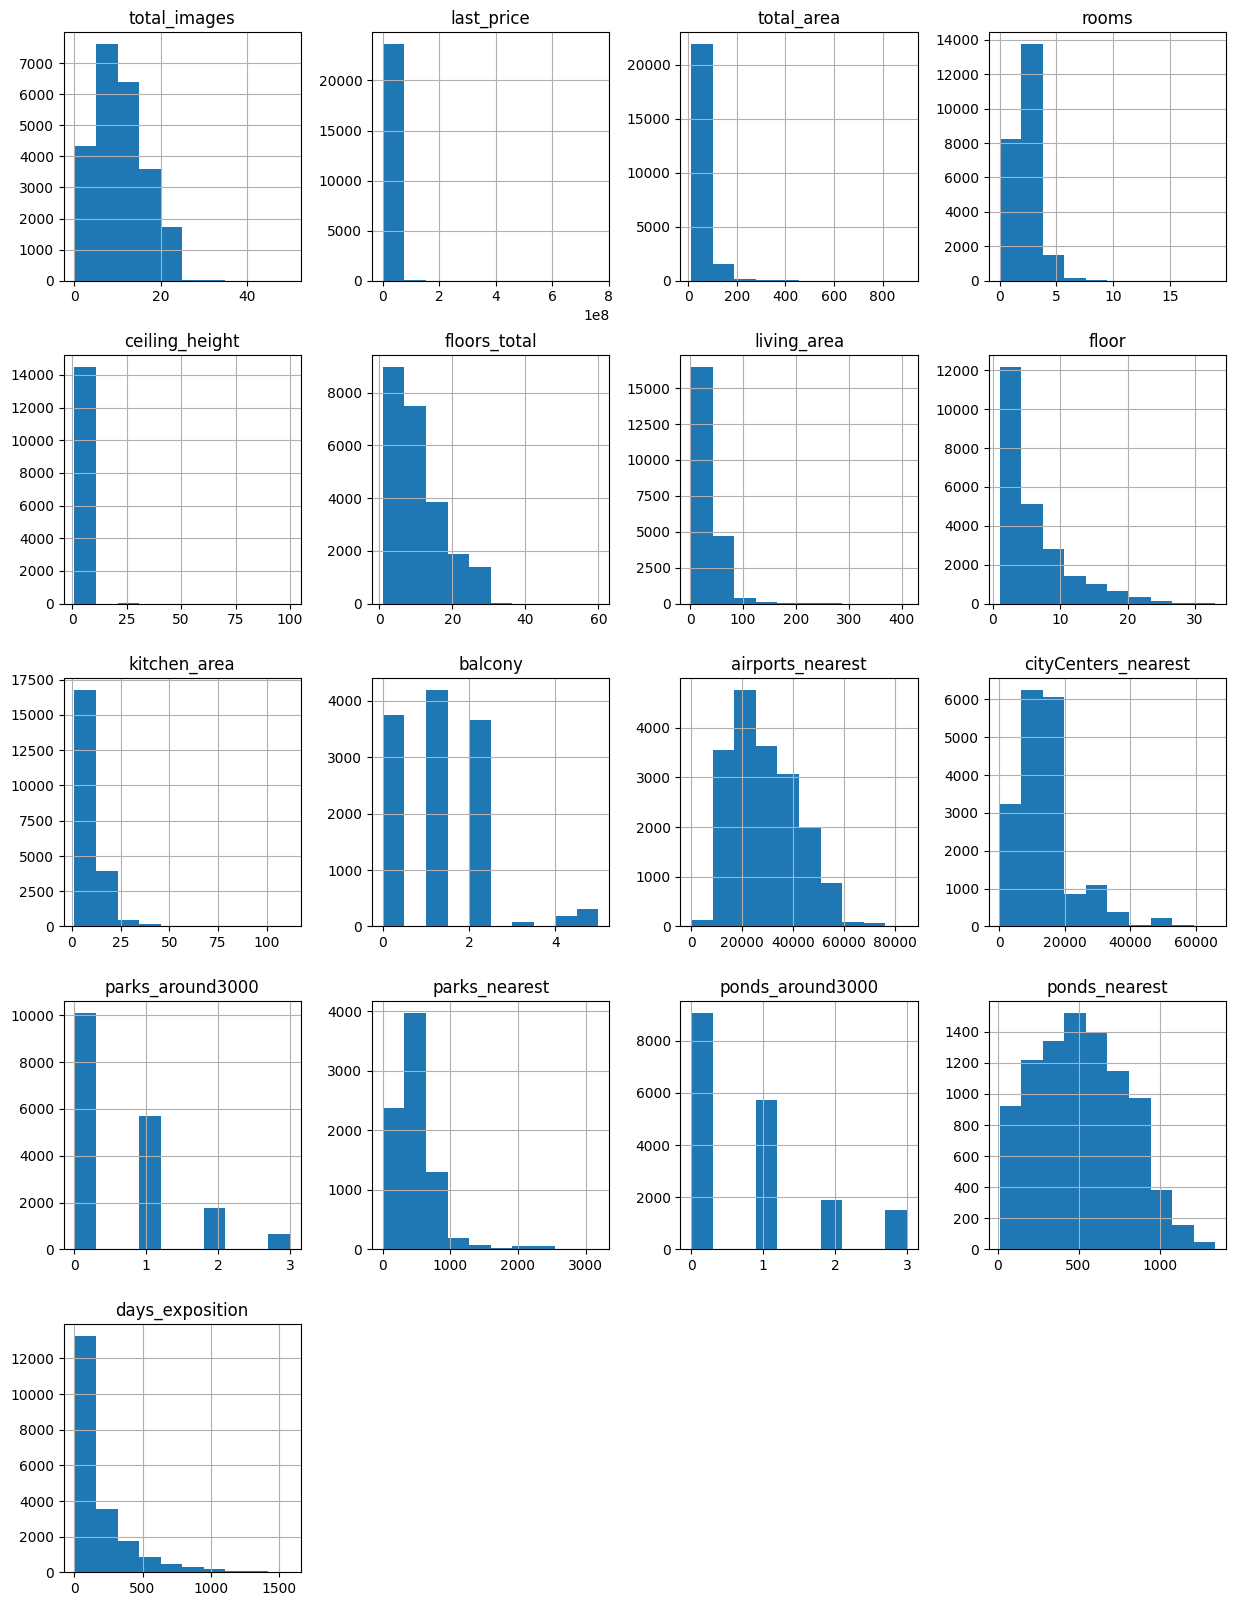

In [4]:
df.hist(figsize=(15, 20))
plt.show()

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.duplicated().sum()

0

### Предобработка данных

In [7]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

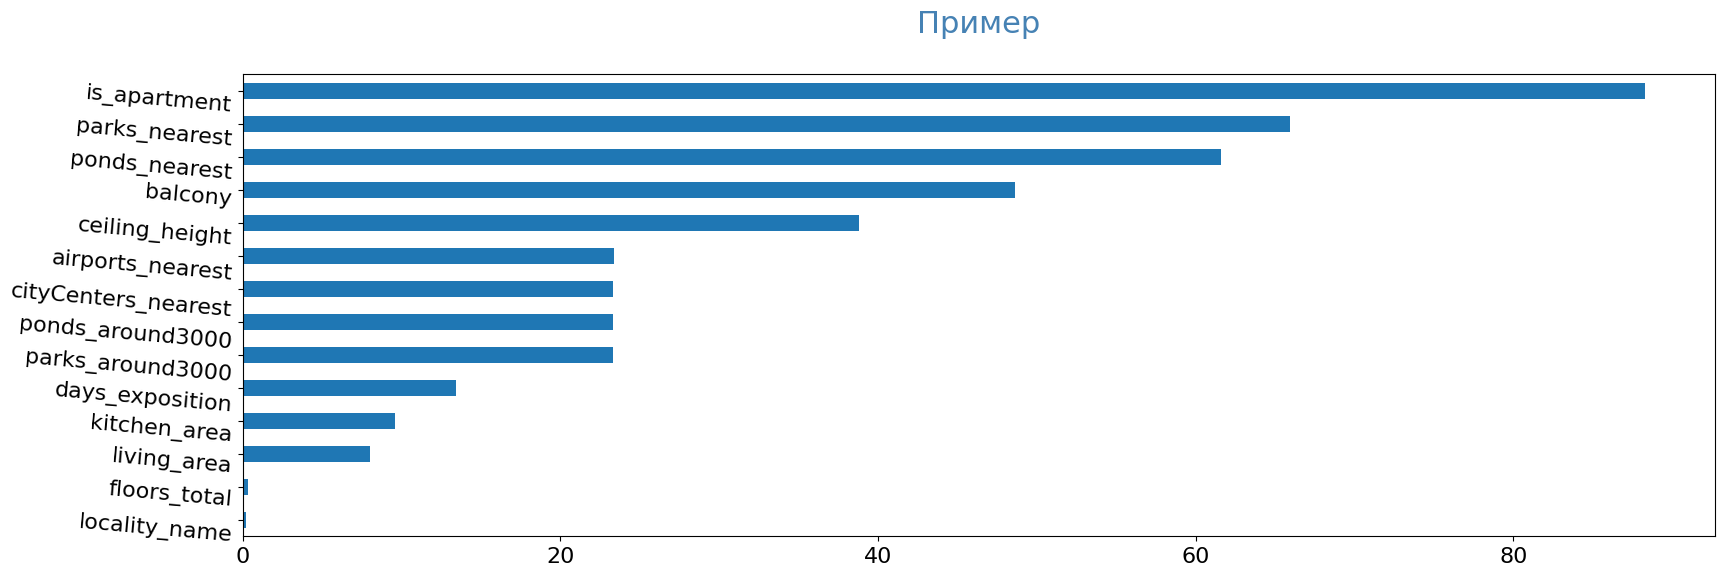

In [9]:
pass_value_barh(df)

In [10]:
# check
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [11]:
### NaN в balcony => 0
df.loc[:, 'balcony'].fillna(0, inplace=True)

### NaN в is_apartment => 0
df.loc[:, 'is_apartment'].fillna(0, inplace=True)


### NaN в living_area => средним в разрезе total_area
df.loc[:,'total_area_groups'] = pd.qcut(df['total_area'], 10, labels=False)

mask = (~df['living_area'].isna()) & (df['kitchen_area'].isna())
df.loc[mask,'living_area_percent'] = df.loc[mask,'living_area']/df.loc[mask,'total_area']
df.loc[mask,'kitchen_area_percent'] = 0.89 - df.loc[mask,'living_area_percent']

mask = (df['living_area'].isna()) & (~df['kitchen_area'].isna())
df.loc[mask,'kitchen_area_percent'] = df.loc[mask,'kitchen_area']/df.loc[mask,'total_area']
df.loc[mask,'living_area_percent'] = 0.89 - df.loc[mask,'kitchen_area_percent']

mask = ~df['living_area'].isna()
group_living_percent = df.groupby('total_area_groups')['living_area_percent'].median().to_dict()
for cat in df['total_area_groups'].unique():
    df.loc[df['total_area_groups']==cat,'living_area_percent'] = \
    df.loc[df['total_area_groups']==cat,'living_area_percent'].fillna(group_living_percent[cat])

df.loc[~mask,'living_area'] = df.loc[~mask,'living_area_percent']*df.loc[~mask,'total_area']

### NaN в kitchen_area => средним в разрезе total_area

mask = ~df['kitchen_area'].isna() # берем только заполненные строки
df.loc[mask,'kitchen_area_percent'] = df.loc[mask,'kitchen_area']/df.loc[mask,'total_area']
group_kitchen_percent = df.groupby('total_area_groups')['kitchen_area_percent'].median().to_dict()

for cat in df['total_area_groups'].unique():
    df.loc[df['total_area_groups']==cat,'kitchen_area_percent'] = \
    df.loc[df['total_area_groups']==cat,'kitchen_area_percent'].fillna(group_kitchen_percent[cat])

df.loc[~mask,'kitchen_area'] = df.loc[~mask,'kitchen_area_percent']*df.loc[~mask,'total_area']


df.drop(['total_area_groups', 'kitchen_area_percent', 'living_area_percent'], axis=1, inplace=True)

К пропускам в данных, например, могут приводить следующие причины:
 * необязательность заполнения критериев (airports_nearest, cityCenters_nearest, parks_around3000 и тд.);
 * очевидность незаполненного значения "по умолчанию" (если про балкон не указано - скорее всего балкона нет; если явно не указано, что это коммерческая недвижимоть (апартаменты), то скорее всего это не так);
 * сложность измерения параметра (очевидно, что некоторые планировки сложно однозначно поделить на жилые-кухонные зоны).

In [12]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [13]:
df.query('total_area*0.90 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,0,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,0,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,0,...,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,0,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,0,...,16.0,0.0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,0,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,0,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,0,...,15.3,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [14]:
print(df.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [15]:
display(df.is_apartment.unique()[:10])
display(df.first_day_exposition.unique()[:10])
display(df.locality_name.unique()[:10])

array([0, True], dtype=object)

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', '2015-07-24T00:00:00',
       '2018-06-19T00:00:00', '2018-09-10T00:00:00',
       '2017-11-02T00:00:00', '2019-04-18T00:00:00',
       '2018-05-23T00:00:00', '2017-02-26T00:00:00'], dtype=object)

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово'], dtype=object)

In [16]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.dropna(subset=['floors_total'], inplace=True)
df['floors_total'] = df['floors_total'].astype('int')

* is_apartment - звучит как булевая переменная, да и принимает два значения, поэтому, полагаю, что она и является булевой переменной.
* first_day_exposition - очевидно, переменная типа "дататайп"
* 'floors_total' - номер этажа - натуральное число

In [17]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [18]:
def replacer(string):
    if pd.isna(string): return np.nan
    return string\
            .replace('ё', 'е')\
            .replace('городского типа', '')\
            .replace('городской поселок', '')\
            .replace('поселок станции', '')\
            .replace('посёлок при железнодорожной', '')\
            .replace('коттеджный поселок', '')\
            .replace('поселок Пансионат', '')\
            .replace('садоводческое некоммерческое товарищество', '')\
            .replace('садовое товарищество', '')\
            .replace('поселок', '')\
            .replace('деревня', '')\
            .replace('село', '')\
            .strip()


df['locality_name'] = df['locality_name'].apply(replacer)

In [19]:
# check

df['locality_name'].nunique()

307

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,35.139109,5.877313,10.617206,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,23.321710,4.873539,6.286343,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-15.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.100000,4.000000,9.126214,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.900000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,501.590000,33.000000,188.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [21]:
# display(df.query('((kitchen_area <= 1.3) or (last_price > 1e+8) or (rooms > 7))'))
# display(df.query('ceiling_height > 15').head())
# display(df.query('last_price < 15000)').head())

# отбрасываем строки с аномальными значениями по соответствующим столбцам
df = df.query('~( \
              (kitchen_area <= 1.3) or\
              (last_price > 5e+7) or\
              (rooms > 7) or\
              (ceiling_height <= 1.75) or\
              (ceiling_height >= 5) or\
              (living_area/total_area < 0.15) or\
              (floors_total > 35)\
             )')


# там, где высота потолка аномальная - переводим значения из, предположительно, сантиметров в метры
# там, где стоимость квартиры, предположительно в тыс. рублей - переводим в рубли.

df.loc[df['last_price'] < 15000, 'last_price'] = df.loc[df['last_price'] < 15000, 'last_price']*1000
df.loc[df['rooms'] == 0, 'rooms'] = 1
df.loc[df['ceiling_height'] > 15, 'ceiling_height'] = df.loc[df['ceiling_height'] > 15, 'ceiling_height']/10

помимо уже описанной в задании аномалии с высотой потолков (среди которых даже выбивающееся значение в 100 метров) так же были обнаружены следующие аномалии:
 * дешевые квартиры - предположительно цена указана в тыс. рублей => значение скорректированно (1)
 * малые кухни => значение удалено (1)
 * дорогие квартиры (сильно искажают гистограммы и средние) => значения удалены (131)
 * большое количество комнат (сильно искажают гистограммы и средние) => значения удалены (31)
 * отсутствие комнат => значение скорректировано на 1 (193)
 * низкие потолки =>  значения удалены (3)
 * низкие потолки =>  значения удалены (11)
 * низкая доля жилой площади => значения удалены (6)
 * высокая этажность зданий => значения удалены (6)




In [22]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,373.00","23,373.00","14,330.00","20,243.00","23,373.00","23,373.00","23,373.00","23,373.00","23,373.00"
min,1.00,13.00,2.00,1.00,"430,000.00",5.00,1.47,1.00,1.00
max,7.00,517.00,4.80,"1,580.00","50,000,000.00",358.31,100.70,33.00,35.00


In [23]:
# check
df.rooms.value_counts().to_frame()

,rooms
1,8161
2,7885
3,5752
4,1143
5,296
6,88
7,48


In [24]:
# check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23373 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23373 non-null  int64         
 1   last_price            23373 non-null  float64       
 2   total_area            23373 non-null  float64       
 3   first_day_exposition  23373 non-null  datetime64[ns]
 4   rooms                 23373 non-null  int64         
 5   ceiling_height        14330 non-null  float64       
 6   floors_total          23373 non-null  int64         
 7   living_area           23373 non-null  float64       
 8   floor                 23373 non-null  int64         
 9   is_apartment          23373 non-null  bool          
 10  studio                23373 non-null  bool          
 11  open_plan             23373 non-null  bool          
 12  kitchen_area          23373 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] <= 0:
        return np.nan
    else:
        return 'другой'

In [26]:
df['square_price'] = df['last_price'] / df['total_area'] # цена одного квадратного метра
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday # день недели публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month # месяц публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year # год публикации объявления
df['floor_type'] = df.apply(floor_type, axis=1) # тип этажа квартиры
df['cityCenters_nearest_km'] = df['cityCenters_nearest']//1000 # расстояние до центра города в километрах

In [27]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,13.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23373 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23373 non-null  int64         
 1   last_price              23373 non-null  float64       
 2   total_area              23373 non-null  float64       
 3   first_day_exposition    23373 non-null  datetime64[ns]
 4   rooms                   23373 non-null  int64         
 5   ceiling_height          14330 non-null  float64       
 6   floors_total            23373 non-null  int64         
 7   living_area             23373 non-null  float64       
 8   floor                   23373 non-null  int64         
 9   is_apartment            23373 non-null  bool          
 10  studio                  23373 non-null  bool          
 11  open_plan               23373 non-null  bool          
 12  kitchen_area            23373 non-null  float6

count    23373.000000
mean        59.051903
std         30.279099
min         13.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        517.000000
Name: total_area, dtype: float64

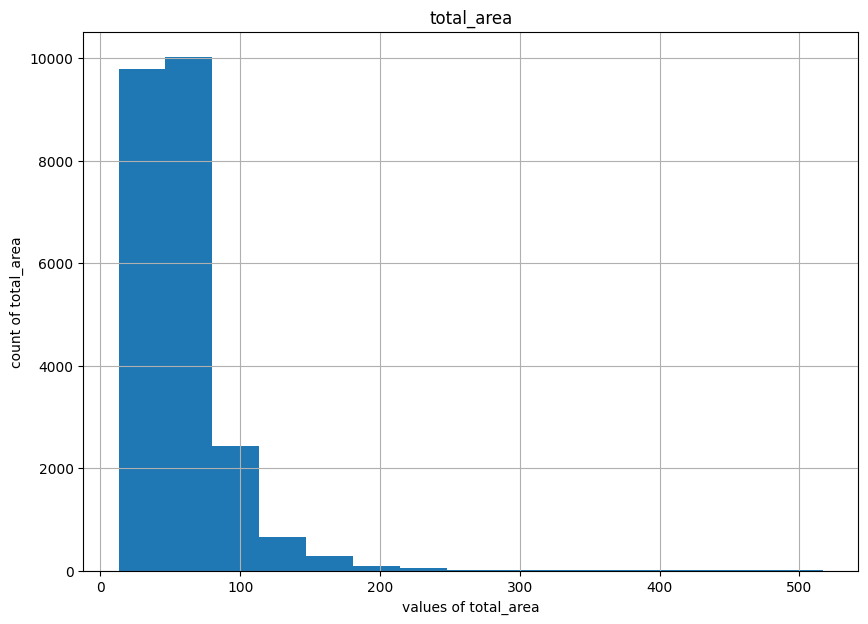

count    23373.000000
mean        34.336904
std         20.121008
min          5.000000
25%         19.000000
50%         30.000000
75%         42.540000
max        358.312200
Name: living_area, dtype: float64

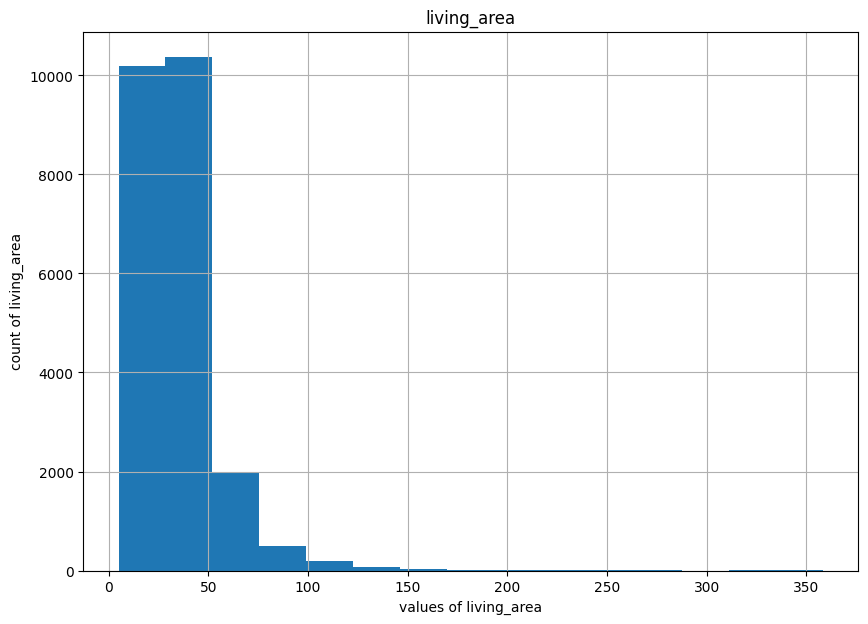

count    23373.000000
mean        10.473439
std          5.577189
min          1.470000
25%          7.000000
50%          9.100000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64

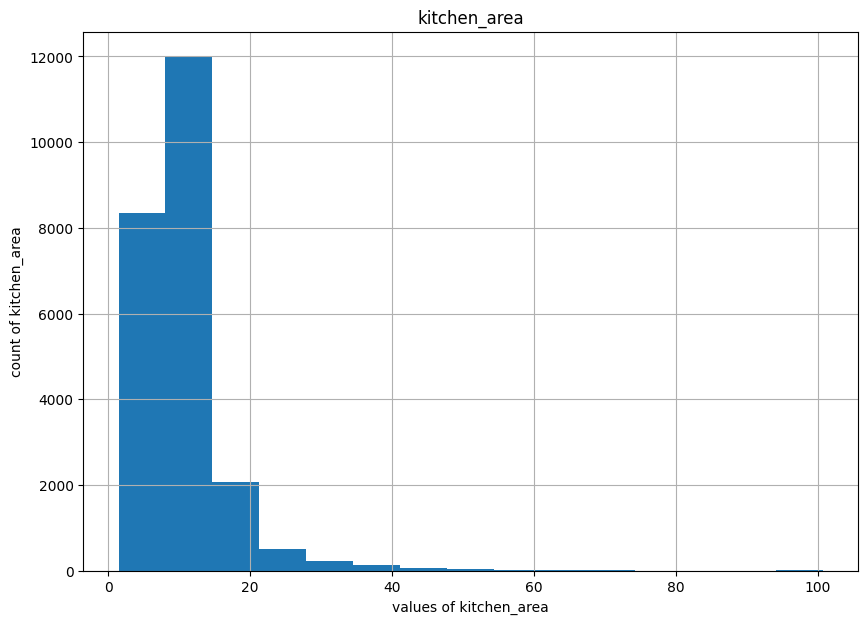

count    2.337300e+04
mean     5.980760e+06
std      4.928686e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

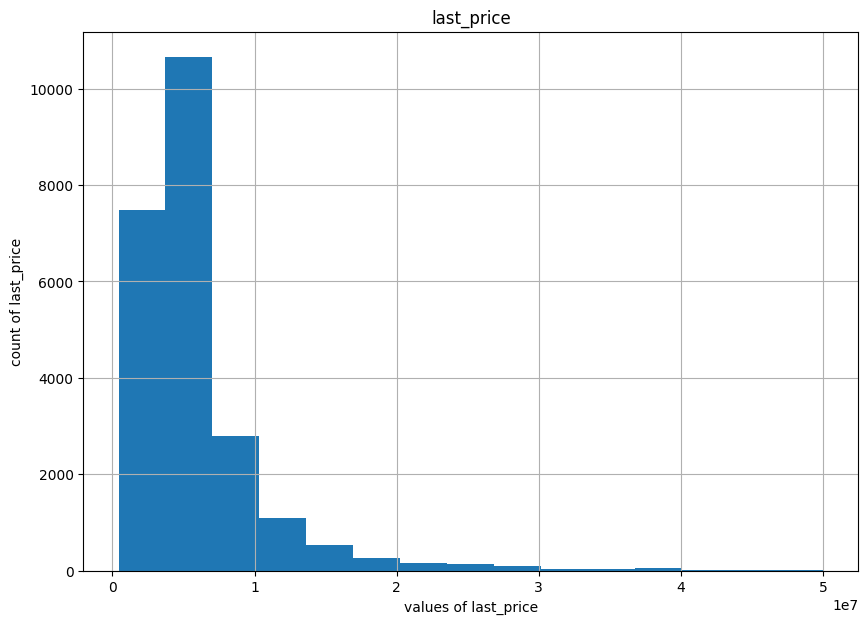

count    23373.000000
mean         2.058058
std          1.006530
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

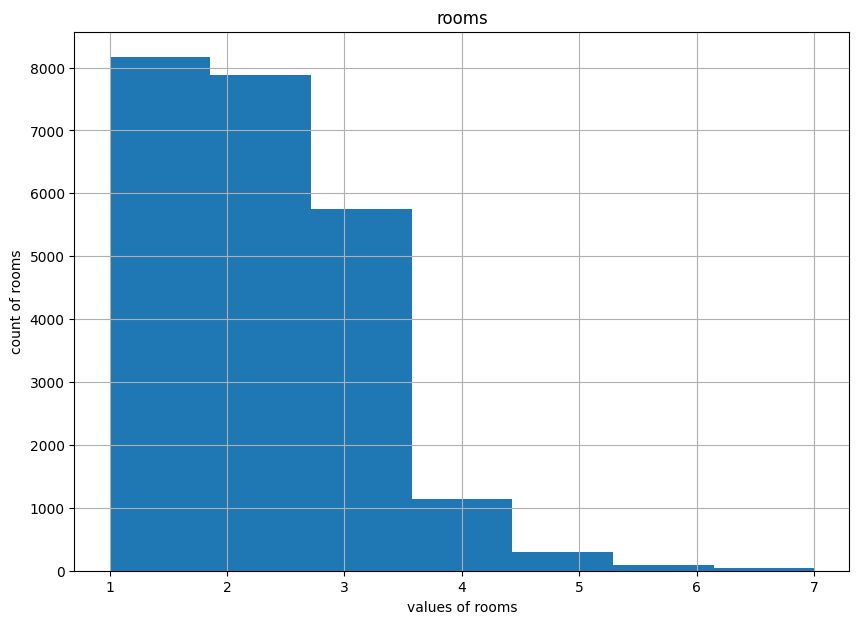

count    14330.000000
mean         2.720457
std          0.263899
min          2.000000
25%          2.502500
50%          2.650000
75%          2.800000
max          4.800000
Name: ceiling_height, dtype: float64

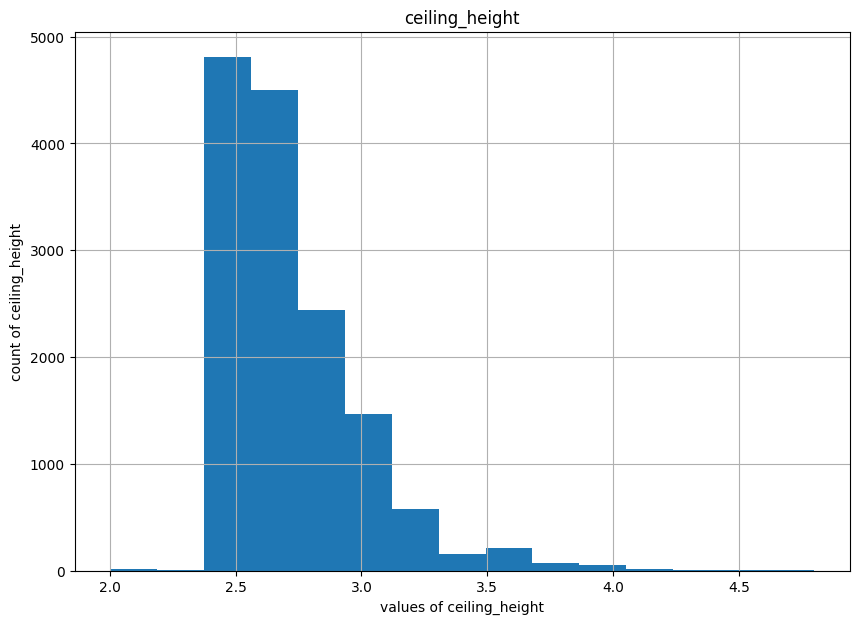

count    23373.000000
mean         5.878150
std          4.873573
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

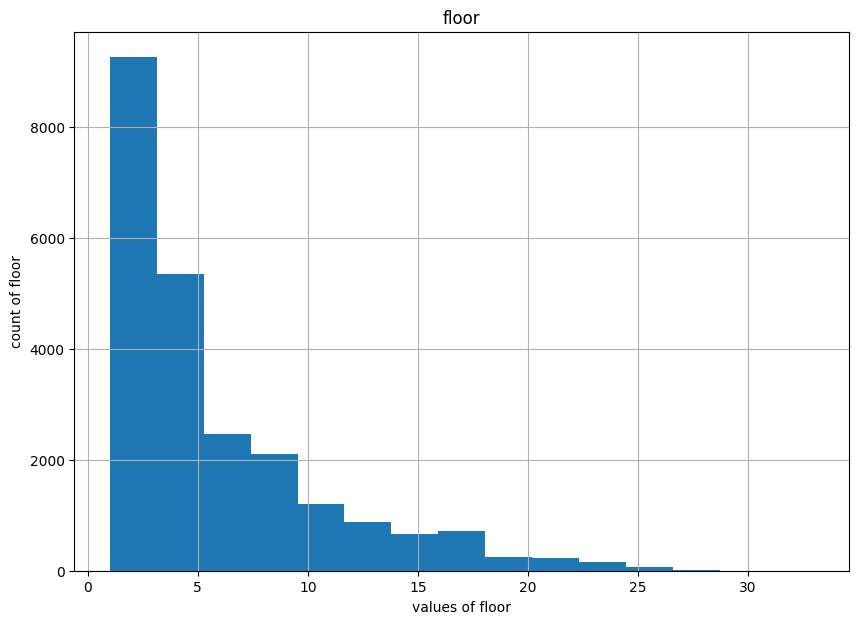

count      23373
unique         3
top       другой
freq       17206
Name: floor_type, dtype: object

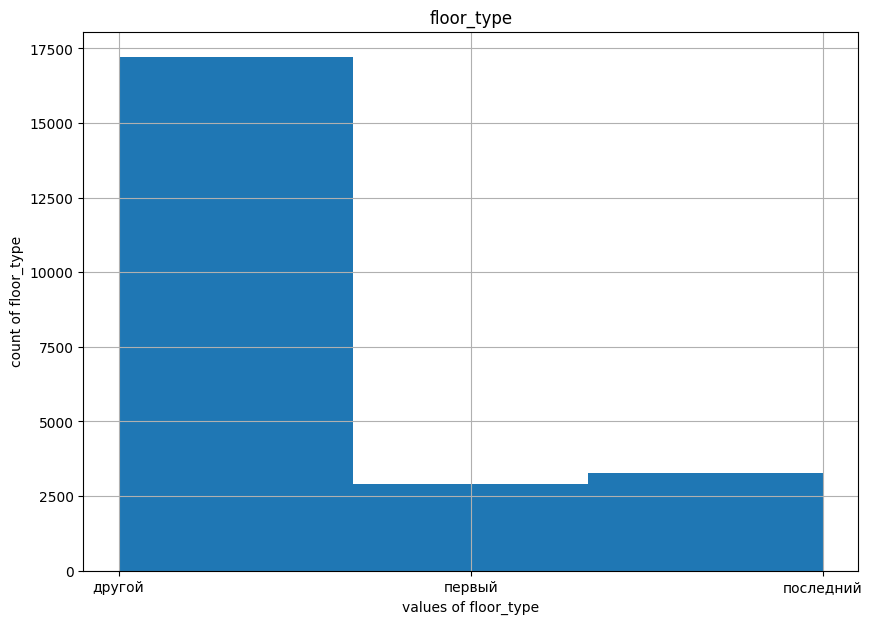

count    23373.000000
mean        10.688059
std          6.582364
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

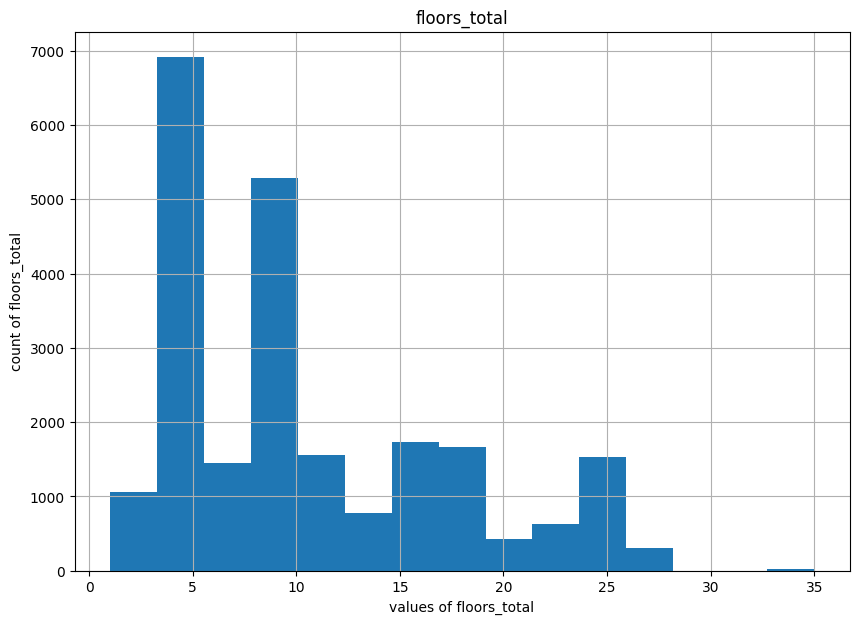

count    17890.000000
mean        13.771548
std          8.603213
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: cityCenters_nearest_km, dtype: float64

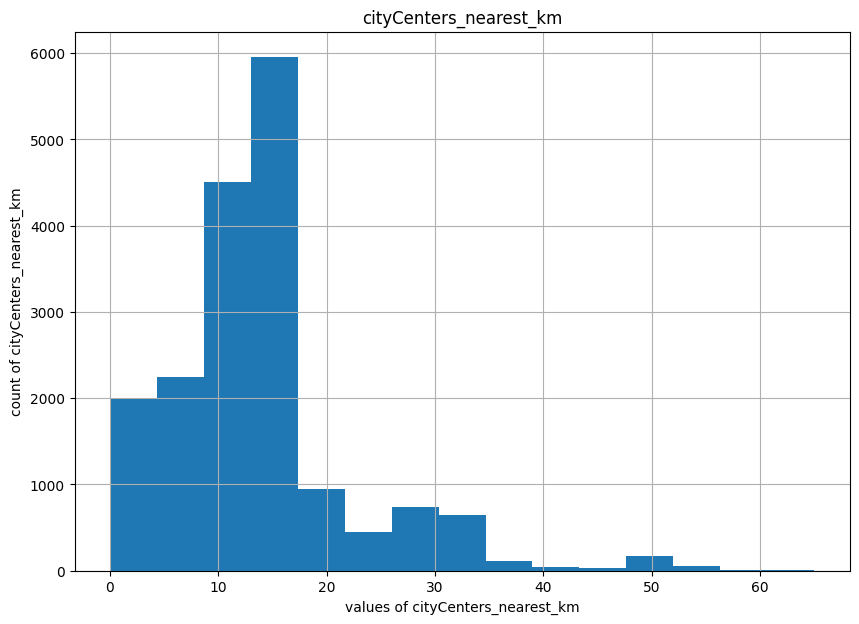

count    17869.000000
mean     28822.411495
std      12668.091916
min          0.000000
25%      18522.000000
50%      26773.000000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64

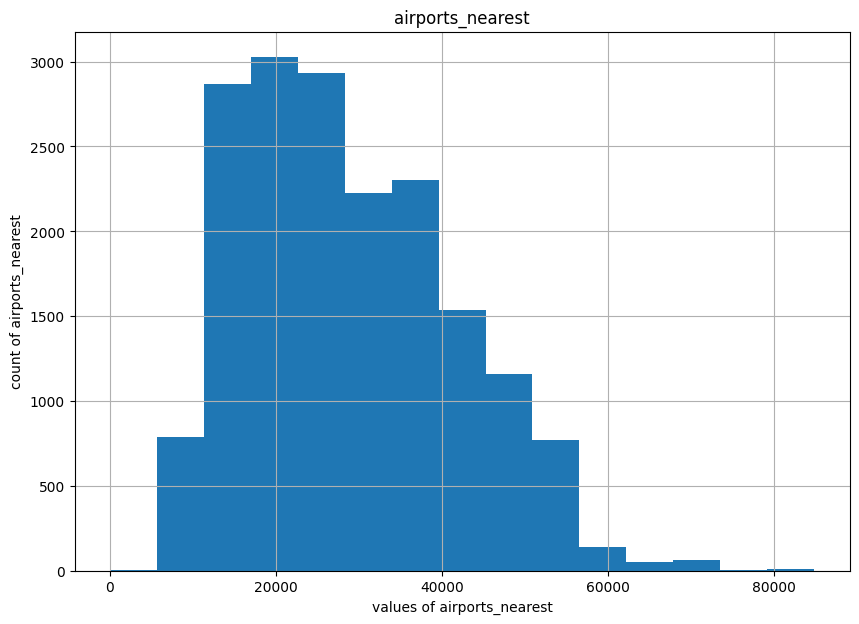

count    7898.000000
mean      492.081666
std       341.562621
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

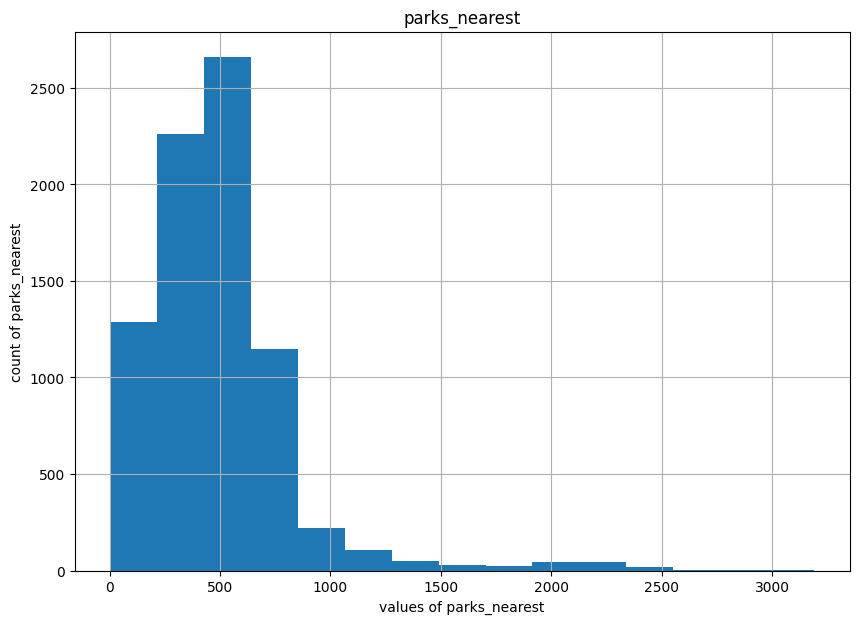

count    23373.000000
mean         2.567278
std          1.788939
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

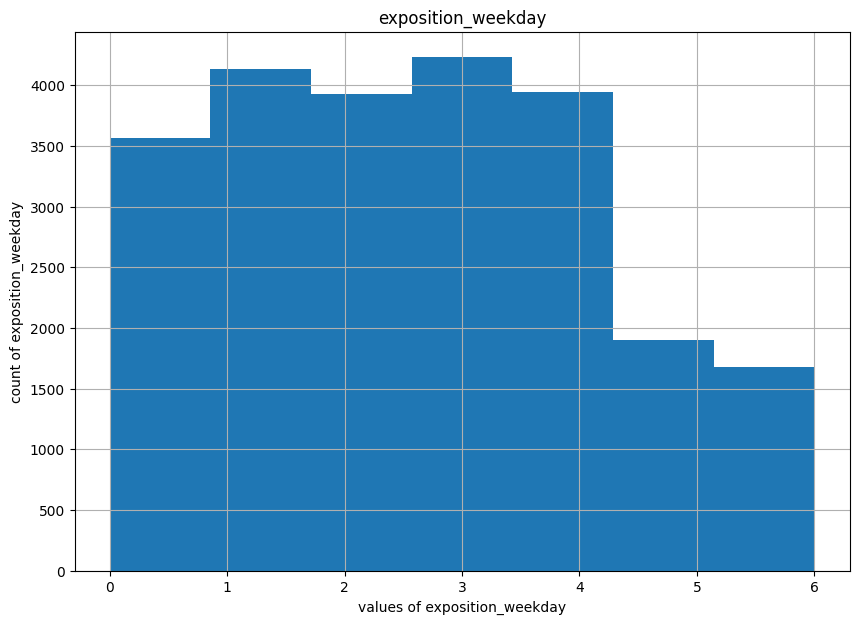

count    23373.000000
mean         6.400034
std          3.493017
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

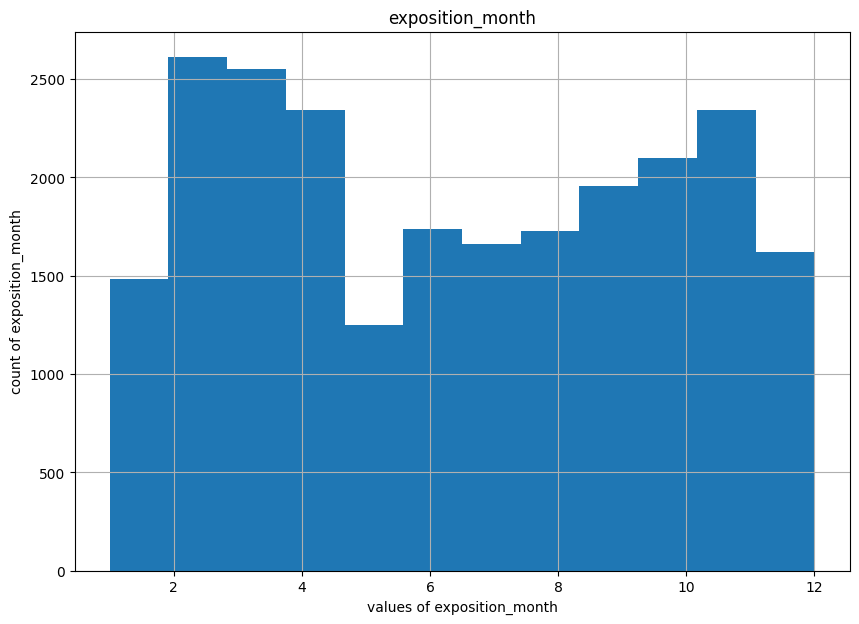

In [29]:
columns_for_research = ['total_area',
                        'living_area',
                        'kitchen_area',
                        'last_price',
                        'rooms',
                        'ceiling_height',
                        'floor',
                        'floor_type',
                        'floors_total',
                        'cityCenters_nearest_km',
                        'airports_nearest',
                        'parks_nearest',
                        'exposition_weekday',
                        'exposition_month'
                       ]

for col in columns_for_research:
    df[col].hist(bins=min(15, df[col].nunique()), figsize=(10, 7))
    display(df[col].describe())
    plt.title(col)
    plt.ylabel(f'count of {col}')
    plt.xlabel(f'values of {col}')
    plt.show()

Наблюдения:
* в целом распределение столь разных величин весьма похожи и напоминают пуассоновское распеределение с  разной степенью тяжести хвостов. Исключение составляют разве что категориальные переменные (количество комнат, месяцы составления объявлений);
* большинство  объявлений о продаже приходится на весенний и осенний периоды;
* параметр этажности домов, очевидно, имеет несколько выбивающихся значений (что в целом объясняется типовой застройкой)
* по общей площади среднее значение - 59, медианное - 52, особенностей не выявлено.
* по жилой площади среднее значение - 34.34, медианное - 30, особенностей не выявлено.
* по кухонной площади среднее значение - 10.47, медианное - 9.1, особенностей не выявлено.
* по 'последней цене' среднее значение - ~6 млн., медианное - ~4.6 млн., хвост рапределения, хоть и не "тяжелый", но крайне длинный.
* по количеству комнат среднее значение - 2.05, медианное - 2, особенностей не выявлено.
* по высоте потолков среднее значение - 2.72, медианное - 2.65, особенностей не выявлено.
* по этажности зданий среднее значение - 5.88, медианное - 4, этажность зданий выглядит крайне занимательно... или нет, все же особенностей не выявлено.
* по типу этажности квартир - как ни странно - ни первый и ни последний - самый распространенный вариант.
* по этажности квартир - среднее значение - 10.69, медианное - 9, особенности описаны выше.
* по близости относительно центра - среднее значение - 13.7 км, медианное - 13 км, интересно, хотя и ожидаемо, что у отдаленных от городов поселков значения достаточно велики.
* по близости относительно аэропорта - среднее значение - 28.82 км, медианное - 26.77 км, особенностей не выявлено.
* по близости относительно парка - среднее значение - 492 м, медианное - 456 м, особенностей не выявлено.
* по дню (недели) публикации - среднее (если это вообще допустимо для таких величин) - середина среды, медианное - четверг, особенностей не выявлено.
* по месяцу публикации - среднее (если это все еще допустимо для таких величин) - середина июня, медианное - июнь, особенностей не выявлено

In [30]:
df.rooms.value_counts()

1    8161
2    7885
3    5752
4    1143
5     296
6      88
7      48
Name: rooms, dtype: int64

<AxesSubplot: >

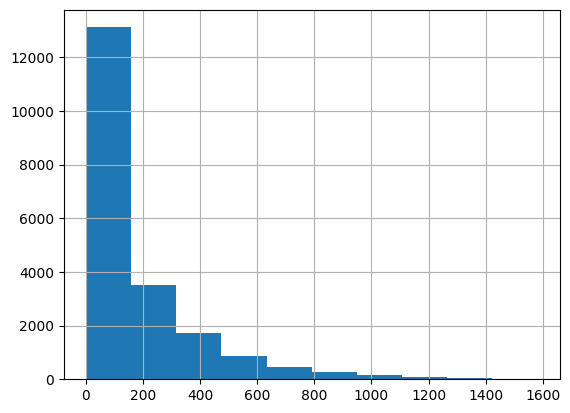

In [31]:
df['days_exposition'].hist()

среднее количество дней размещения каждого объявления 180.11
медианное количество дней размещения каждого объявления 95.0


count    20243.000000
mean       180.112483
std        218.996423
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot: >

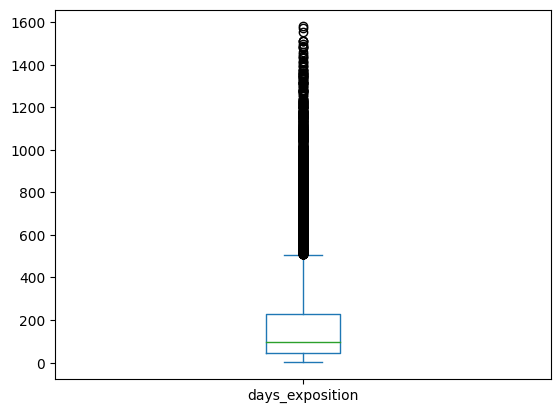

In [32]:
print(f'среднее количество дней размещения каждого объявления {df["days_exposition"].mean():0.2f}')
print(f'медианное количество дней размещения каждого объявления {df["days_exposition"].median()}')
display(df['days_exposition'].describe())
df[['days_exposition']].plot(kind='box')

In [33]:
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
print(max(Q1-1.5*IQR, 0), Q3+1.5*IQR)

0 507.5


Если для принятия решения о том, была сделка по продаже квартиры быстрой или нет руководствоваться IQR,
то, в целом, сверхбыстрых сделок мы вообще не наблюдем, те, что хотя бы не превосходят первый квантиль (45 дней) - уже успех. Касательно верхней грани срока продажи - выбросы начинаются после значения 507.5 дней - такие сделки нетипично долгие.

total_area            0.779141
living_area           0.686330
kitchen_area          0.593757
rooms                 0.500138
exposition_weekday   -0.015586
exposition_month      0.005289
exposition_year      -0.044802
last_price            1.000000
Name: last_price, dtype: float64

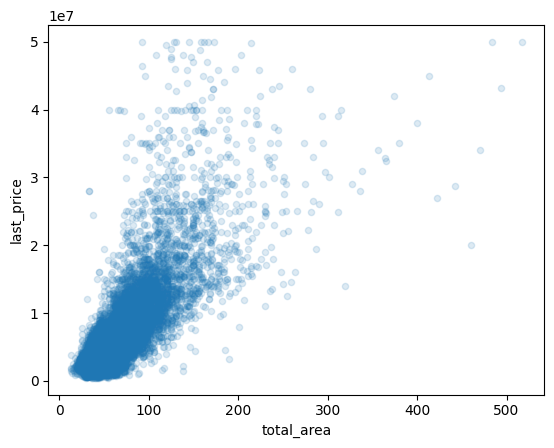

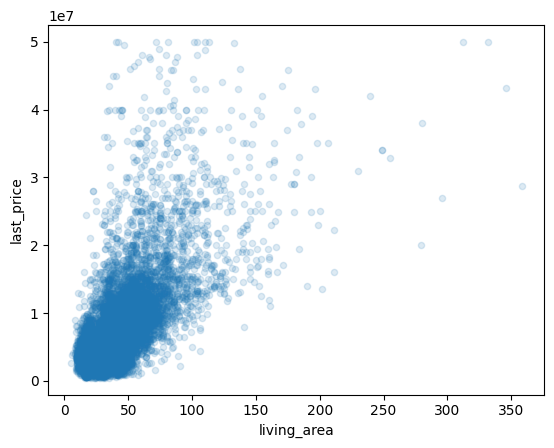

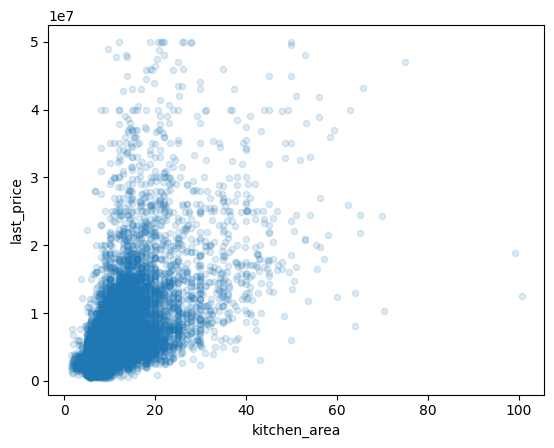

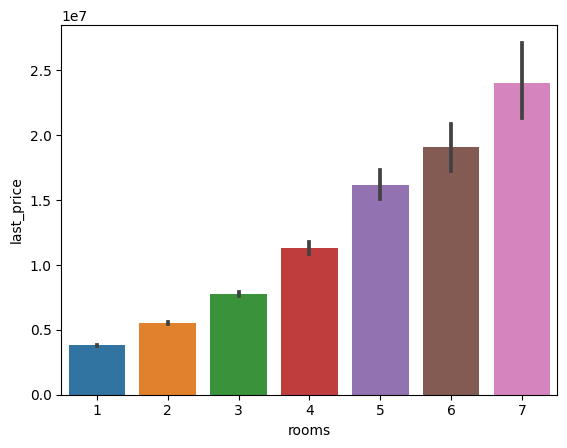

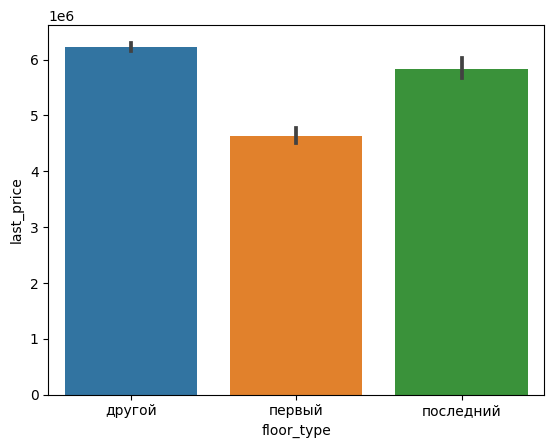

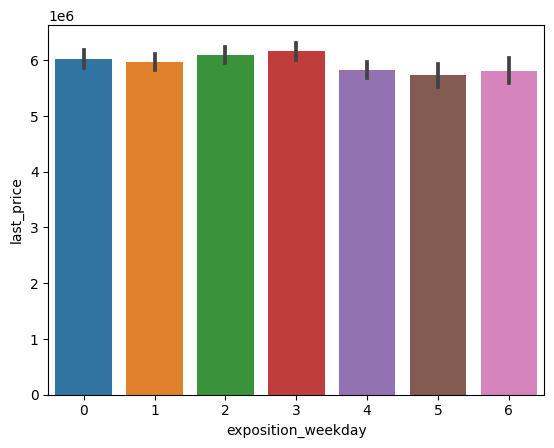

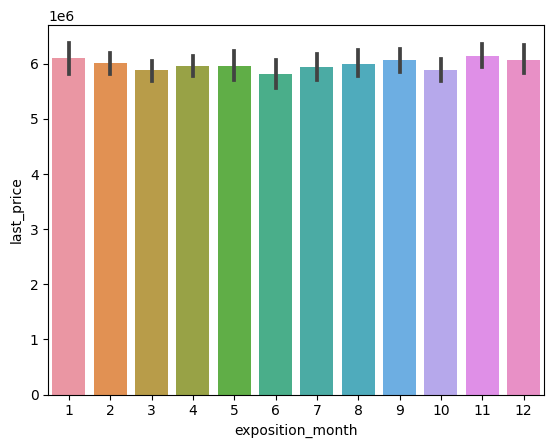

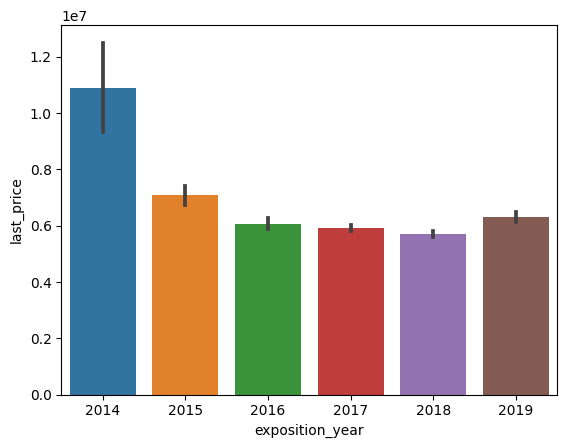

In [34]:
columns_for_additional_research = ['total_area',
                                   'living_area',
                                   'kitchen_area',
                                   'rooms',                  
                                   'floor_type',
                                   'exposition_weekday',
                                   'exposition_month',
                                   'exposition_year',
                                  ]

display(df[columns_for_additional_research+['last_price']].corr()['last_price'])

for col in columns_for_additional_research:
    if  df[col].dtype == 'float':
        df.plot(kind='scatter', x=col, y='last_price', alpha=0.15)
        plt.show()
    else:
        sns.barplot(data=df, x=col, y='last_price')
        plt.show()

In [35]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург    15440
Мурино               577
Кудрово              468
Шушары               438
Всеволожск           396
Пушкин               369
Колпино              337
Парголово            327
Гатчина              306
Выборг               237
Name: locality_name, dtype: int64

locality_name
Санкт-Петербург    112242.760649
Пушкин             103125.819291
Кудрово             95305.363676
Парголово           90175.913458
Мурино              85912.387977
Шушары              78577.014984
Колпино             75333.295801
Гатчина             68757.678644
Всеволожск          68685.451212
Выборг              58141.909153
Name: square_price, dtype: float64

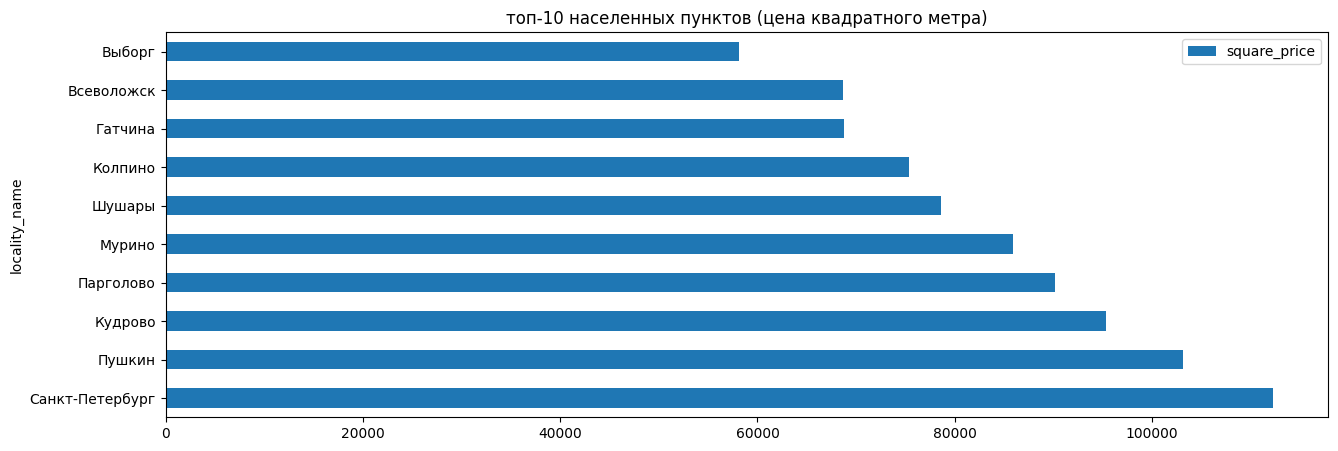

In [36]:
top10_locations_names = df['locality_name'].value_counts().head(10).index

top10_locations_df = (df\
    .loc[df['locality_name'].isin(top10_locations_names)]\
    .groupby('locality_name')['square_price']\
    .mean()\
    .sort_values(ascending=False))

display(top10_locations_df)
top10_locations_df.plot(kind='barh', legend=True, figsize=(15, 5), title='топ-10 населенных пунктов (цена квадратного метра)')
plt.show()

cityCenters_nearest_km
0.0     1.620513e+07
1.0     1.229812e+07
2.0     1.131031e+07
3.0     1.067613e+07
4.0     1.185912e+07
5.0     1.190752e+07
6.0     1.139034e+07
7.0     9.728965e+06
8.0     8.434861e+06
9.0     6.386538e+06
10.0    6.277561e+06
11.0    5.919349e+06
12.0    5.969217e+06
13.0    6.025217e+06
14.0    5.765348e+06
15.0    5.548882e+06
16.0    5.485934e+06
17.0    4.872388e+06
18.0    5.367376e+06
19.0    4.703802e+06
20.0    6.341157e+06
21.0    5.183239e+06
22.0    5.425513e+06
23.0    4.126867e+06
24.0    3.862235e+06
25.0    4.048664e+06
26.0    3.575000e+06
27.0    8.300000e+06
28.0    4.910500e+06
29.0    3.833333e+06
Name: last_price, dtype: float64

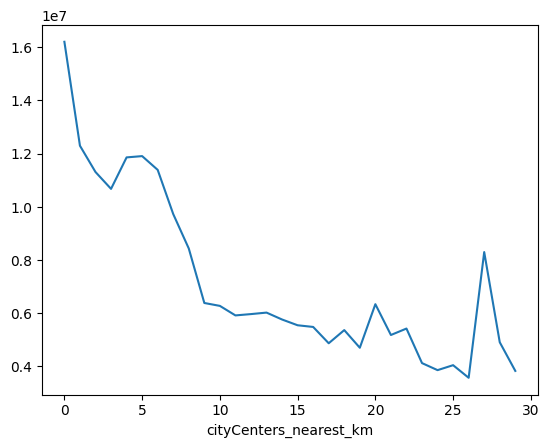

In [37]:
spb_km_price = df\
    .loc[df['locality_name'] == 'Санкт-Петербург']\
    .groupby('cityCenters_nearest_km')['last_price'].mean()

display(spb_km_price)
spb_km_price.plot(kind='line')
plt.show()

В целом по графику видно, что стоимость квадратного метра уменьшается при удалении от центра города. При этом нельзя не отметить, что график содержит "всплески" на отметках ~5, ~20 и ~27 километрах. Для точного определения природы таких выбросов требуются дальнейшее исследование, но в качестве жизнеспособной теории можно допустить:
* строительство "элитных" ЖК и микрорайонов;
* близость к бизнес-центрам и других особым точкам интереса.

### Общий вывод

Общие выводы по исследовательскому проекту в данном случае практически не содержат неожиданных поворотов и достаточно интуитивны:
 * в части предобработки данных мы убедились, что существует немало объектов с аномальными значениями параметров (огромная стоимость, количество комнат и тд);
 * стоимость квартир значительно зависит от общей и жилищно/кухонных площадей, удаленности от центра, места расположения, а также количества комнат (в данной проекте мы несколько приопускаем вопрос мультиколлинеарности);
 * несмотря на то, что влияние других параметров объектов на их стоимость (линейно!) слабо выражена - их влияние в разрезе других параметров потенциально может быть велико и может служить предметом дальнейшего исследования.

### Бонус

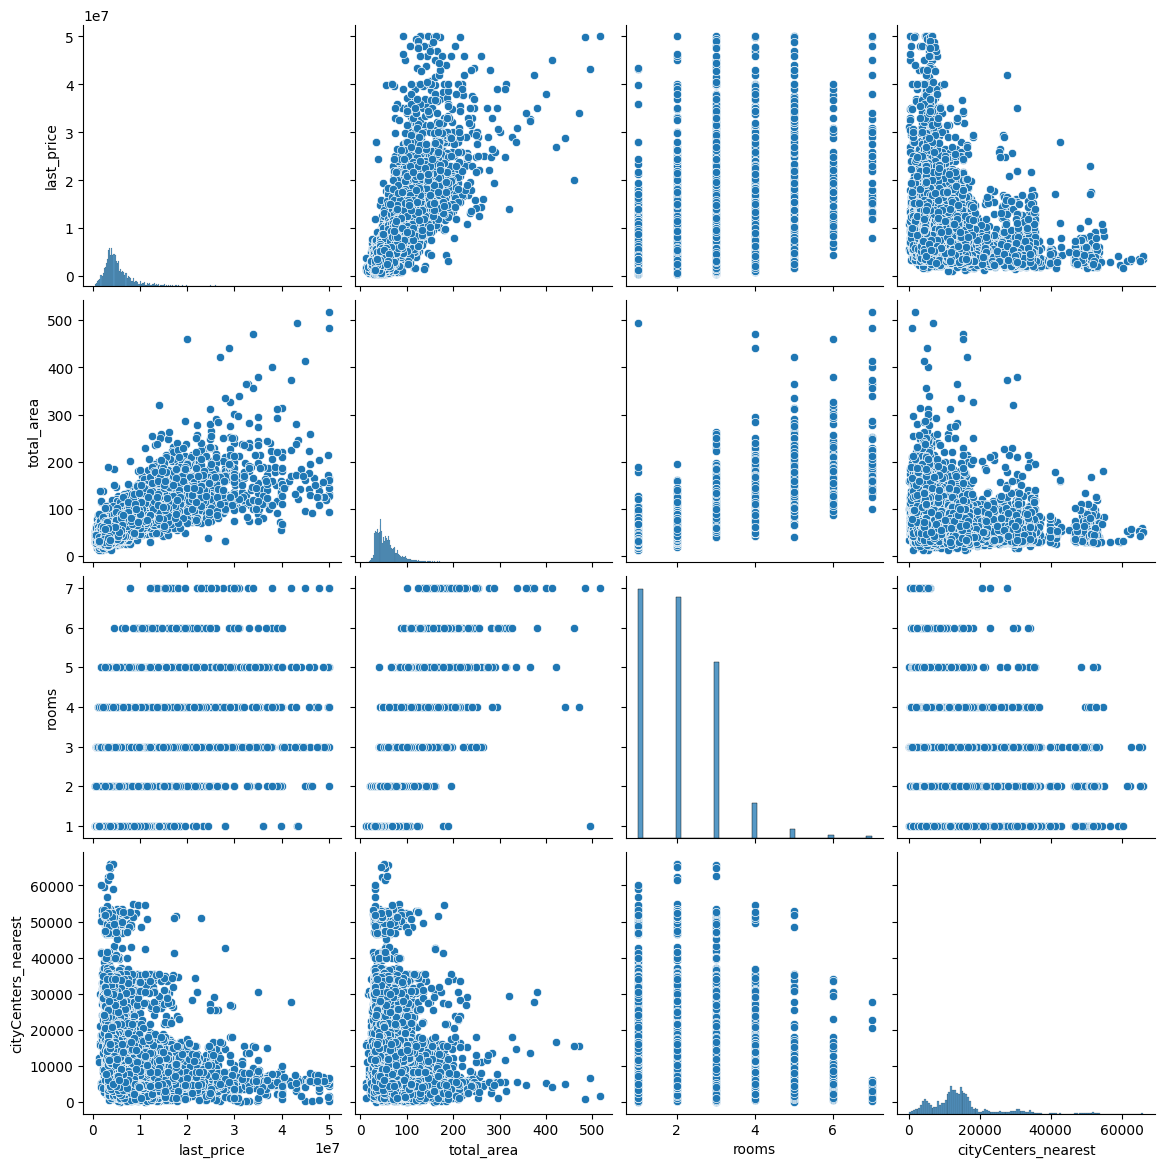

In [38]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])

plt.gcf().set_size_inches(12,12);

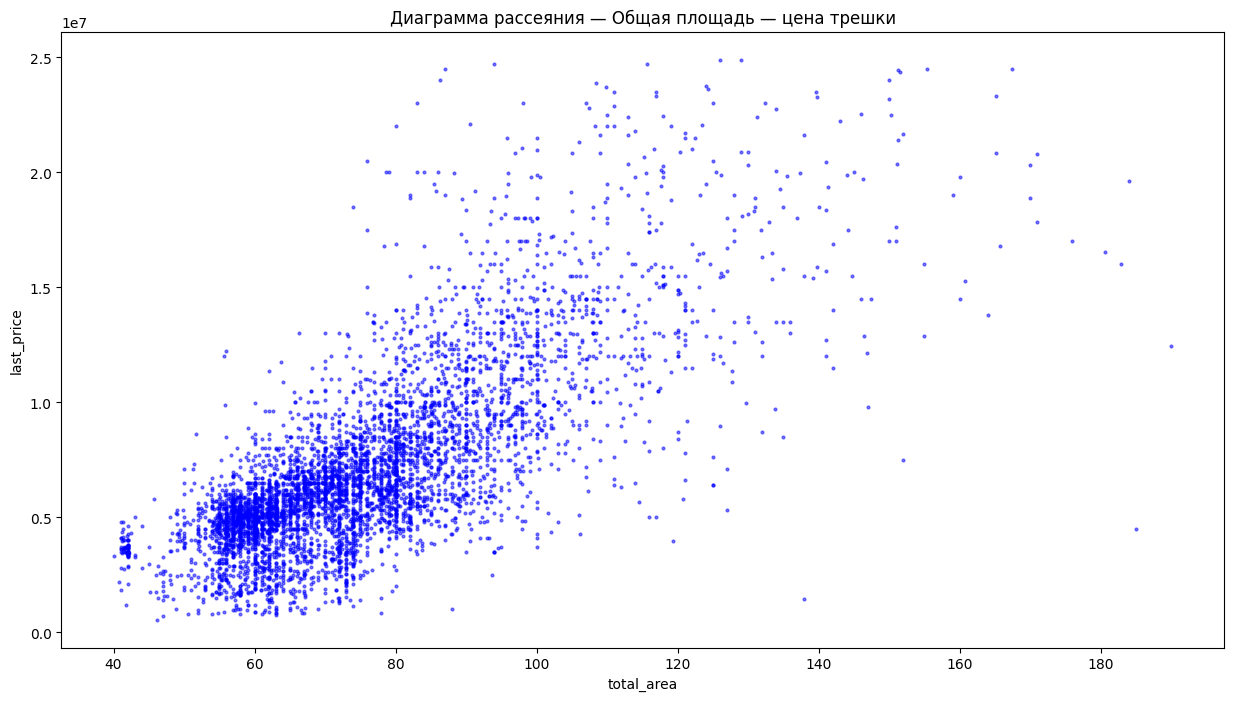

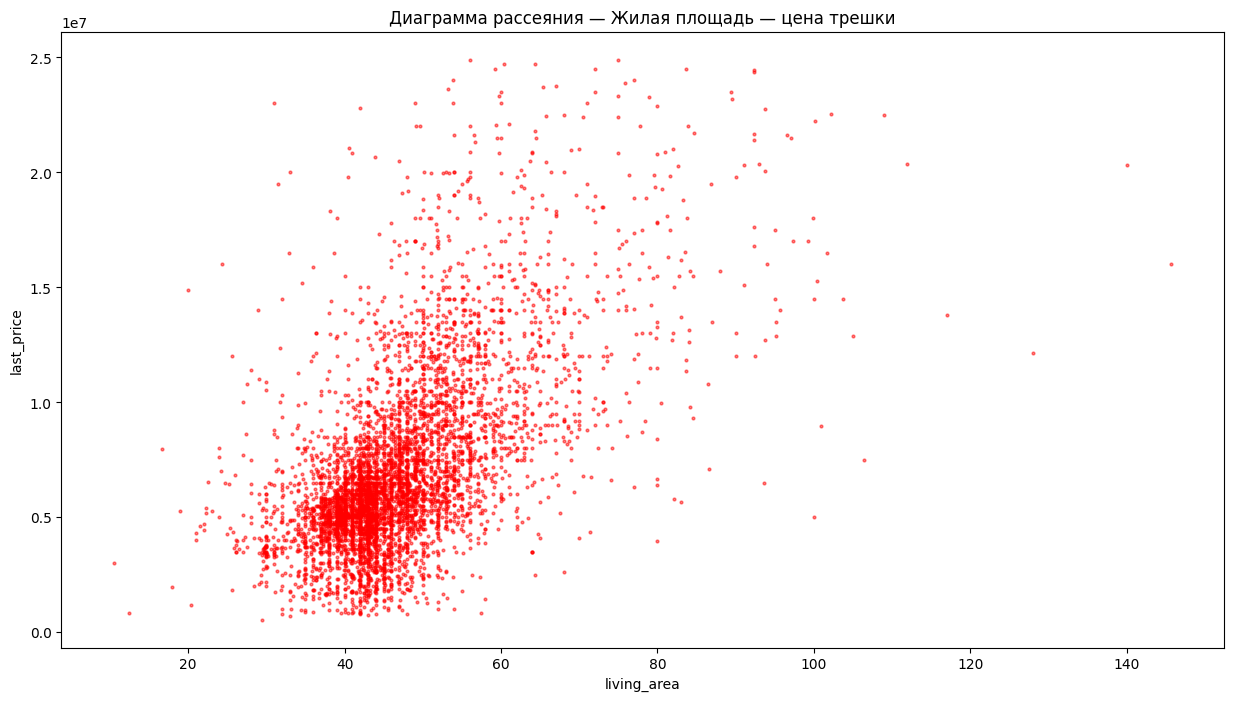

In [39]:
# check

data = df.copy()

data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');